In [21]:
import numpy as np
import math
from scipy.spatial.transform import Rotation

# Rotation Matrix https://www.youtube.com/watch?v=8XRvpDhTJpw

# Quaterion
Q = [1, 0, 0, 0]


# Initialize a single rotation. 
# Quaternions will be normalized before initialization.
r = Rotation.from_quat(Q)

Q = r.as_quat()
M = r.as_matrix()
E = r.as_euler('zyx', degrees=True)

# Initialize the rotation from Rotation Matrix and Eulerian Angle. 
r = Rotation.from_matrix(M)
r = Rotation.from_euler('zyx', E, degrees=True)


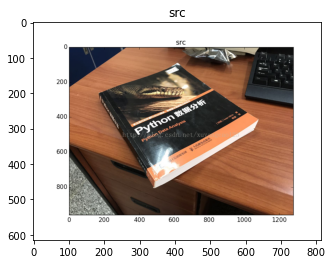

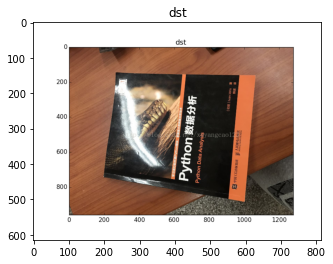

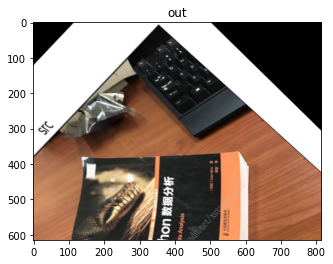

In [22]:
import cv2
import numpy as np
import pylab as pl
 
if __name__ == '__main__' :
    
 
    # Read source image.
    im_src = cv2.imread('book1.jpg')
    # Four corners of the book in source image
    pts_src = np.array([[167.0, 264.0], [482.0, 798.0], [1079.0, 403.0],[613.0, 84.0]])
 
 
    # Read destination image.
    im_dst = cv2.imread('book2.jpg')
    # Four corners of the book in destination image.
    pts_dst = np.array([[193.0, 742.0],[996.0, 874.0],[1059.0, 157.0],[266.0, 145.0]])
 
    # Calculate Homography
    h, status = cv2.findHomography(pts_src, pts_dst)
     
    # Warp source image to destination based on homography
    im_out = cv2.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
     
    pl.figure(), pl.imshow(im_src[:, :, ::-1]), pl.title('src'),
    pl.figure(), pl.imshow(im_dst[:, :, ::-1]), pl.title('dst')
    pl.figure(), pl.imshow(im_out[:, :, ::-1]), pl.title('out'), pl.show()